In [20]:
import torch
import torch.nn as nn

from model_factories import get_golem_model, get_resnet18_model, get_resnet34_model, get_vitbase_model
from dataloaders import get_dataloaders
from model_utils import train_epoch, eval, getBestModelParams
from plotter import plot_images, plot_metrics

In [21]:
device = torch.device(
        "mps"
        if torch.backends.mps.is_available()
        else "cuda" if torch.cuda.is_available() else "cpu"
    )

EPOCHS = 10

IsTesting = False

# CIFAR-10(0) TEST RUN

## Data for Custom Backbone, ResNet18, ResNet34 Models
Models use images of size 32x32

In [34]:
train_loader, test_loader, classes = get_dataloaders(test_run=IsTesting)
CLASSES_NUM = len(classes)

## Optimal Model Hyperparameters for Custom Backbone Classifier

In [23]:
gc = get_golem_model(CLASSES_NUM)
gc.to(device)

lr, loss, criterion, optim = getBestModelParams(gc, train_loader, device)
print(f"Optim lr: {lr}\nLoss: {loss}\nBest optim: {optim}\nBest loss func: {criterion}")

LR = lr

# LR = 1e-3
# criterion = nn.CrossEntropyLoss
# optim = torch.optim.Adam

Test for optim <class 'torch.optim.adam.Adam'> and loss func <class 'torch.nn.modules.loss.CrossEntropyLoss'>: 
Learning rate: 0.0001
1/3: loss=5858.329753398895
2/3: loss=4942.452739953995
3/3: loss=4493.869508624077
Learning rate: 0.001
1/3: loss=6014.108030796051
2/3: loss=4789.953636407852
3/3: loss=4431.413820028305
Learning rate: 0.01
1/3: loss=8361.20794415474
2/3: loss=9161.86899805069
Learning rate: 0.1
1/3: loss=2482640.605966568
2/3: loss=26275589.73554039
Test for optim <class 'torch.optim.sgd.SGD'> and loss func <class 'torch.nn.modules.loss.CrossEntropyLoss'>: 
Learning rate: 0.0001
1/3: loss=926679594.71875
2/3: loss=238889375.4140625
3/3: loss=144629241.8046875
Learning rate: 0.001
1/3: loss=nan
Learning rate: 0.01
1/3: loss=nan
Learning rate: 0.1
1/3: loss=nan
Test for optim <class 'torch.optim.rmsprop.RMSprop'> and loss func <class 'torch.nn.modules.loss.CrossEntropyLoss'>: 
Learning rate: 0.0001
1/3: loss=nan
Learning rate: 0.001
1/3: loss=nan
Learning rate: 0.01
1/3

## Sceanrio 1 - Custom Backbone

In [24]:
gc = get_golem_model(CLASSES_NUM)
gc.to(device)

criterion_gc = criterion()
optimizer_gc = optim(params=gc.parameters(), lr=LR)

In [25]:
for i in range(EPOCHS):
    loss = train_epoch(gc, criterion_gc, optimizer_gc, train_loader, device)
    print(f"{i+1}/{EPOCHS}: loss={loss}")

1/10: loss=6846.257397890091
2/10: loss=5002.477596521378
3/10: loss=4573.837255597115
4/10: loss=4327.60558450222
5/10: loss=4173.925975561142
6/10: loss=4015.088399529457
7/10: loss=3885.455757021904
8/10: loss=3751.87444794178
9/10: loss=3648.4506944417953
10/10: loss=3569.7553477287292


Custom backbone results: 
Avg loss 2.917153446057353
Accu 0.30809998512268066
Precision 0.31402482430868023
Recall 0.30809999999999993
F-score 0.29676515233421336



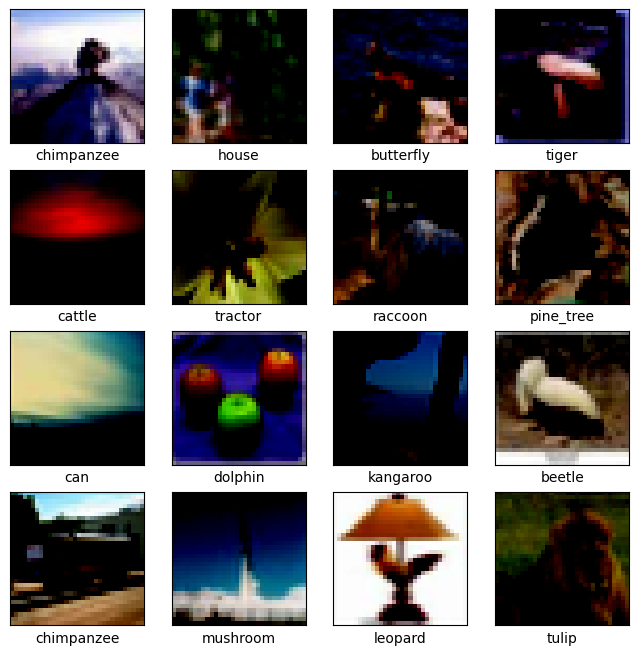

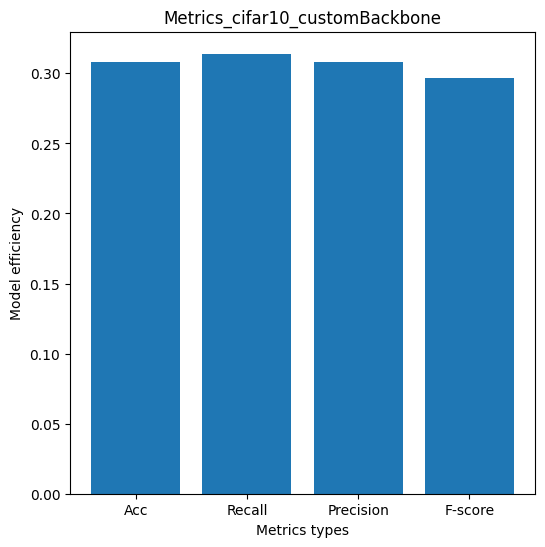

In [26]:
loss, metrics, preds = eval(gc, criterion_gc, test_loader, device)
accuracy, precision, recall, f1 = metrics
print("Custom backbone results: ")
print(f"Avg loss {loss}\nAccu {accuracy}\nPrecision {precision}\nRecall {recall}\nF-score {f1}\n")

plot_images(test_loader, preds, classes, title="Classification_cifar10_customBackbone")
plot_metrics(metrics, title="Metrics_cifar10_customBackbone")

## Scenario 2 - ResNet18

In [27]:
gc = get_resnet18_model(CLASSES_NUM)
gc.to(device)

criterion_gc = criterion()
optimizer_gc = optim(params=gc.parameters(), lr=LR)

In [28]:
for i in range(EPOCHS):
    loss = train_epoch(gc, criterion_gc, optimizer_gc, train_loader, device)
    print(f"{i+1}/{EPOCHS}: loss={loss}")

1/10: loss=5994.57409119606
2/10: loss=5058.865341424942
3/10: loss=4492.385828733444
4/10: loss=4063.839508652687
5/10: loss=3730.8331521749496
6/10: loss=3464.4947875738144
7/10: loss=3252.8114976882935
8/10: loss=2904.001175403595
9/10: loss=2680.6009054780006
10/10: loss=2553.6494185328484


ResNet18 results: 
Avg loss 3.013750137231601
Accu 0.3529999852180481
Precision 0.37983319119336906
Recall 0.353
F-score 0.3531205974960238



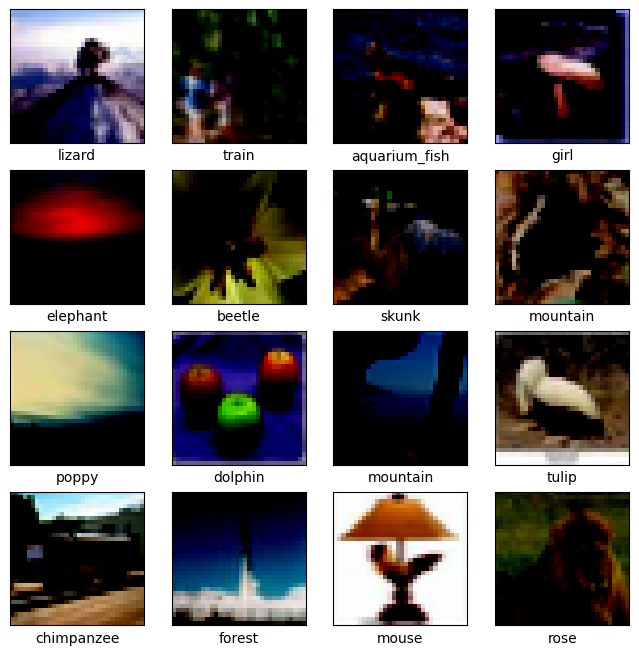

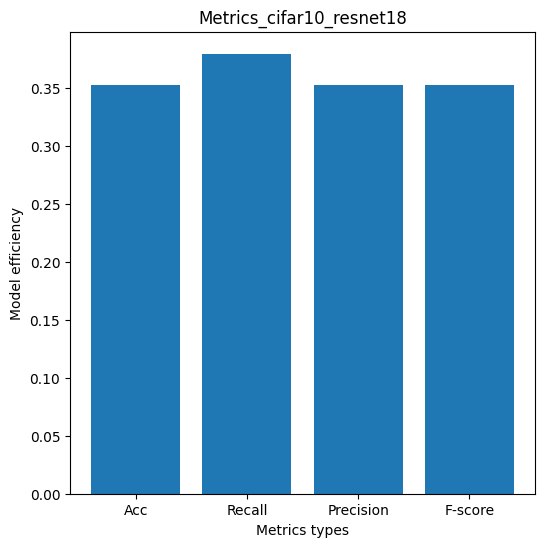

In [29]:
loss, metrics, preds = eval(gc, criterion_gc, test_loader, device)
accuracy, precision, recall, f1 = metrics
print("ResNet18 results: ")
print(f"Avg loss {loss}\nAccu {accuracy}\nPrecision {precision}\nRecall {recall}\nF-score {f1}\n")

plot_images(test_loader, preds, classes, title="Classification_cifar10_resnet18")
plot_metrics(metrics, title="Metrics_cifar10_resnet18")

## Scenario 3 - ResNet34

In [30]:
gc = get_resnet34_model(CLASSES_NUM)
gc.to(device)

criterion_gc = criterion()
optimizer_gc = optim(params=gc.parameters(), lr=LR)

In [31]:
for i in range(EPOCHS):
    loss = train_epoch(gc, criterion_gc, optimizer_gc, train_loader, device)
    print(f"{i+1}/{EPOCHS}: loss={loss}")

1/10: loss=6359.153681755066
2/10: loss=5550.583122730255
3/10: loss=5154.130609750748
4/10: loss=4720.871729850769
5/10: loss=4519.720219492912
6/10: loss=4172.055443763733
7/10: loss=4041.846317410469
8/10: loss=3641.1334388256073
9/10: loss=3536.46433031559
10/10: loss=3219.0689539909363


ResNet34 results: 
Avg loss 2.865242812580194
Accu 0.39480000734329224
Precision 0.41661015069352436
Recall 0.39480000000000004
F-score 0.389225236564156



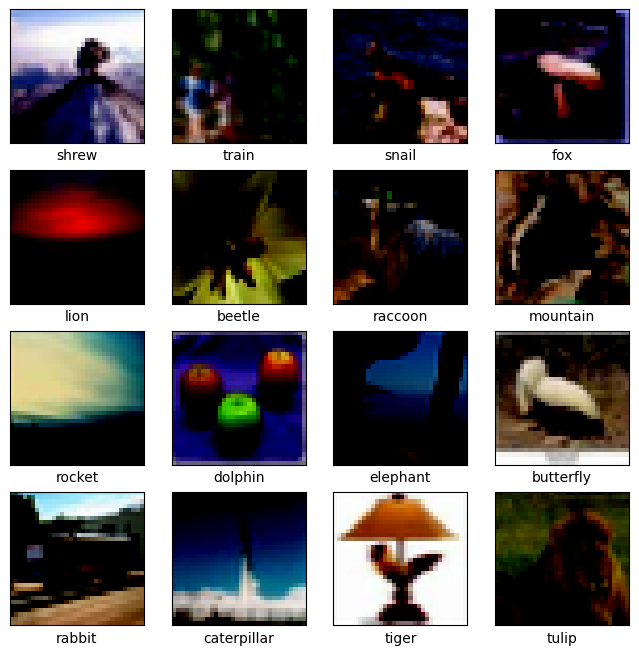

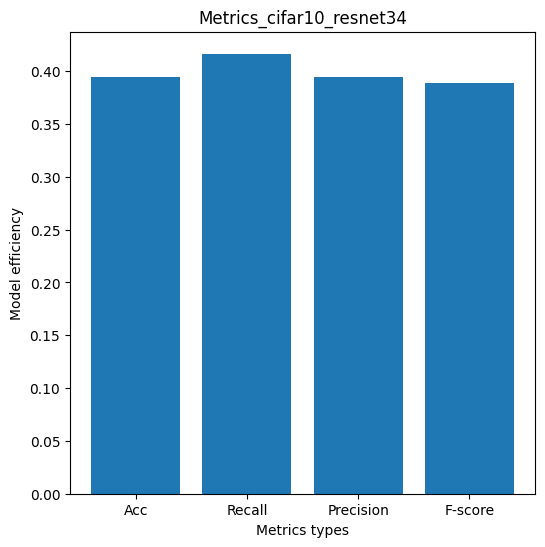

In [32]:
loss, metrics, preds = eval(gc, criterion_gc, test_loader, device)
accuracy, precision, recall, f1 = metrics
print("ResNet34 results: ")
print(f"Avg loss {loss}\nAccu {accuracy}\nPrecision {precision}\nRecall {recall}\nF-score {f1}\n")

plot_images(test_loader, preds, classes, title="Classification_cifar10_resnet34")
plot_metrics(metrics, title="Metrics_cifar10_resnet34")

# #TO FIX - Data for ViTbase Model
Models use images of size 224x224

In [35]:
train_loader, test_loader, classes = get_dataloaders(test_run=IsTesting, img_size=224)
CLASSES_NUM = len(classes)

## Scenario 4 - ViTbase

In [36]:
gc = get_vitbase_model(CLASSES_NUM)
gc.to(device)

criterion_gc = criterion()
optimizer_gc = optim(params=gc.parameters(), lr=LR)

In [37]:
for i in range(EPOCHS):
    loss = train_epoch(gc, criterion_gc, optimizer_gc, train_loader, device)
    print(f"{i+1}/{EPOCHS}: loss={loss}")

1/10: loss=7022.036247730255
2/10: loss=6880.3431713581085
3/10: loss=6837.337719917297
4/10: loss=6821.360399484634
5/10: loss=6824.740612268448
6/10: loss=6786.769139289856
7/10: loss=6776.315362930298
8/10: loss=6788.582805156708
9/10: loss=6722.697989225388
10/10: loss=6680.175133228302


ViTbase results: 
Avg loss 4.247682265961132
Accu 0.05009999871253967
Precision 0.344213381629616
Recall 0.0501
F-score 0.02742310977974392



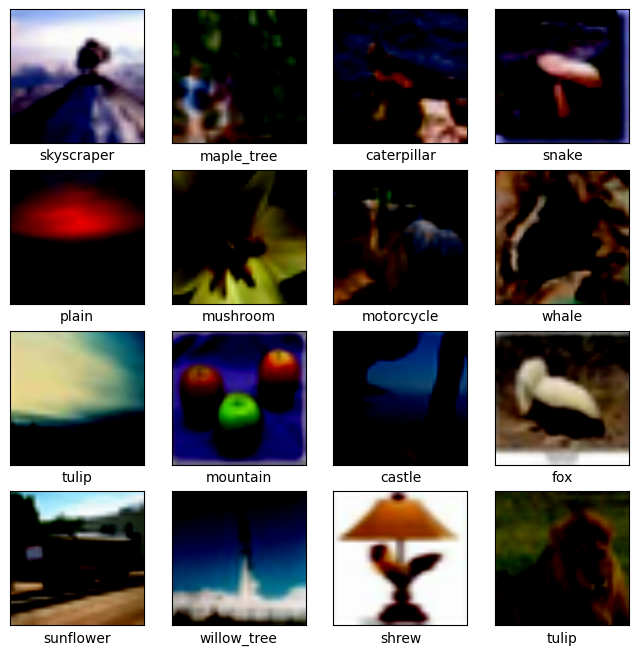

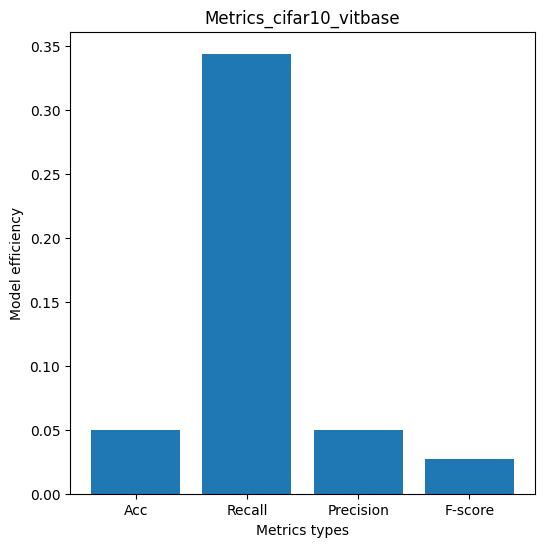

In [38]:
loss, metrics, preds = eval(gc, criterion_gc, test_loader, device)
accuracy, precision, recall, f1 = metrics
print("ViTbase results: ")
print(f"Avg loss {loss}\nAccu {accuracy}\nPrecision {precision}\nRecall {recall}\nF-score {f1}\n")

plot_images(test_loader, preds, classes, title="Classification_cifar10_vitbase")
plot_metrics(metrics, title="Metrics_cifar10_vitbase")